## 6장 19대 대선 자료 분석하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from selenium import webdriver
import time

%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
driver = webdriver.Edge(executable_path='msedgedriver.exe')
driver.get("http://info.nec.go.kr/")

In [8]:
driver.switch_to.default_content()
driver.switch_to.frame('main')
driver.find_element_by_xpath("""//*[@id="menu"]/ul/li[2]/a""").click()

In [9]:
driver.find_element_by_xpath("""//*[@id="topmenu"]/ul/li[4]/a/span""").click()

In [10]:
make_xpath = """//*[contains(text(), "개표단위별 개표결과")]"""
driver.find_elements_by_xpath(make_xpath)[1].click()

In [11]:
driver.find_element_by_xpath("""//*[@id="electionId1"]""").click()

In [12]:
sido_list_raw = driver.find_element_by_xpath("""//*[@id="cityCode"]""")
sido_list = sido_list_raw.find_elements_by_tag_name("option")
sido_names_values = [option.text for option in sido_list]
sido_names_values = sido_names_values[1:]
sido_names_values

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [13]:
element = driver.find_element_by_id("cityCode")
element.send_keys(sido_names_values[0])

In [14]:
sigun_list_raw = driver.find_element_by_xpath("""//*[@id="townCode"]""")
sigun_list = sigun_list_raw.find_elements_by_tag_name("option")
sigun_names_values = [option.text for option in sigun_list]
sigun_names_values = sigun_names_values[1:]
sigun_names_values

['종로구',
 '중구',
 '용산구',
 '성동구',
 '광진구',
 '동대문구',
 '중랑구',
 '성북구',
 '강북구',
 '도봉구',
 '노원구',
 '은평구',
 '서대문구',
 '마포구',
 '양천구',
 '강서구',
 '구로구',
 '금천구',
 '영등포구',
 '동작구',
 '관악구',
 '서초구',
 '강남구',
 '송파구',
 '강동구']

In [15]:
element = driver.find_element_by_id("townCode")
element.send_keys(sigun_names_values[0])

In [16]:
driver.find_element_by_xpath("""//*[@id="spanSubmit"]/input""").click()

In [17]:
from bs4 import BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [18]:
tmp = soup.find_all('td', 'alignR')
tmp[1:7]

[<td class="alignR">100,629</td>,
 <td class="alignR">46,130</td>,
 <td class="alignR">49,172</td>,
 <td class="alignR">3,115</td>,
 <td class="alignR">53</td>,
 <td class="alignR">558</td>]

### 6-2 20대 대선 개표 결과 데이터 획득하기

In [19]:
from tqdm import tqdm

sido_name_list = []
sigun_name_list = []

for sido_value in tqdm(sido_names_values):
    element = driver.find_element_by_id("cityCode")
    element.send_keys(sido_value)
    
    time.sleep(1)
    
    sigun_list_raw = driver.find_element_by_xpath("""//*[@id="townCode"]""")
    sigun_list = sigun_list_raw.find_elements_by_tag_name("option")

    sigun_names_values = [option.text for option in sigun_list]
    sigun_names_values = sigun_names_values[1:]

    for sigun_value in sigun_names_values:
        sido_name_list.append(sido_value)
        sigun_name_list.append(sigun_value)

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:31<00:00,  1.85s/it]


In [21]:
sido_name_list[:10]

['서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시']

In [22]:
sigun_name_list[:10]

['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구']

In [23]:
election_result = pd.DataFrame({'광역시도':sido_name_list, '시군':sigun_name_list})
election_result.tail()

,광역시도,시군
245,경상남도,산청군
246,경상남도,거창군
247,경상남도,합천군
248,제주특별자치도,제주시
249,제주특별자치도,서귀포시


In [24]:
def get_vote_info(n):
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml') # 'lxml' 이 뭐지
    
    tmp = soup.find_all('td', 'alignR')
    tmp_values = [float(tmp_val.get_text().replace(',', '')) for tmp_val in tmp[1:7]]
    
    pop[n] = tmp_values[0]    # 투표인구
    lee[n] = tmp_values[1]    # 이재명
    yoon[n] = tmp_values[2]    # 윤석열
    shim[n] = tmp_values[3]    # 심상정
    heo[n] = tmp_values[5]    # 허경영

In [25]:
def fail_procedure(n):
    pop[n] = np.nan
    lee[n] = np.nan
    yoon[n] = np.nan
    shim[n] = np.nan
    heo[n] = np.nan

In [26]:
pop = [np.nan]*len(election_result)
lee = [np.nan]*len(election_result)
yoon = [np.nan]*len(election_result)
shim = [np.nan]*len(election_result)
heo = [np.nan]*len(election_result)

len(pop), len(lee), len(yoon), len(shim), len(heo)

(250, 250, 250, 250, 250)

In [27]:
for n in tqdm(election_result.index):
    try:
        element = driver.find_element_by_id("cityCode")
        element.send_keys(election_result['광역시도'][n])
        
        time.sleep(0.5)
        
        element = driver.find_element_by_id("townCode")
        element.send_keys(election_result['시군'][n])
        
        driver.find_element_by_xpath('//*[@id="spanSubmit"]/input').click()
        
        time.sleep(0.5)
        
        get_vote_info(n)
        
    except:
        print('Error')
        fail_procedure(n)

 35%|████████████████████████████▌                                                    | 88/250 [03:11<04:58,  1.84s/it]

Error


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [08:44<00:00,  2.10s/it]


In [ ]:
driver.close()

In [28]:
election_result['pop'] = pop 
election_result['lee'] = lee
election_result['yoon'] = yoon 
election_result['shim'] = shim
election_result['heo'] = heo
election_result.tail()

,광역시도,시군,pop,lee,yoon,shim,heo
245,경상남도,산청군,24913.0,7125.0,16607.0,464.0,218.0
246,경상남도,거창군,41399.0,11963.0,27254.0,895.0,490.0
247,경상남도,합천군,31270.0,6911.0,22742.0,511.0,311.0
248,제주특별자치도,제주시,296826.0,157695.0,122084.0,10007.0,2496.0
249,제주특별자치도,서귀포시,112823.0,55435.0,50930.0,3591.0,1043.0


In [30]:
election_result.to_csv('./data/06._election_result.csv', encoding='euc-kr', sep=',')

### 6-3 각 후보의 득표율과 지역 ID 정리하기

In [31]:
sido_candi =  election_result['광역시도']
sido_candi = [name[:2] if name[:2] in ['서울','부산','대구','광주','인천','대전','울산'] else '' for name in sido_candi]

In [32]:
def cut_char_sigu(name):
    return name if len(name)==2 else name[:-1]

'중구', '남구'와 같은 두 글자 이름은 그대로, '중랑구', '서초구', '의왕시'와 같은 3글자는 '중랑', '서초', '의왕' 처럼 줄임

In [35]:
import re

sigun_candi = ['']*len(election_result)

for n in election_result.index:
    each = election_result['시군'][n]
    if each[:2] in ['수원', '성남','안양','안산','고양',
                            '용인','청주','천안','전주','포항','창원']:
        sigun_candi[n] = re.split('시', each)[0]+' '+ cut_char_sigu(re.split('시', each)[1])
    else:
        sigun_candi[n] = cut_char_sigu(each)
        
sigun_candi[:10]

['종로', '중구', '용산', '성동', '광진', '동대문', '중랑', '성북', '강북', '도봉']

광역시가 아닌데 행정구 가지고 있다면'안양 만안', '안양 동안'처럼 정리

In [36]:
ID_candi = [sido_candi[n]+' '+sigun_candi[n] for n in range(0,len(sigun_candi))]

ID_candi = [name[1:] if name[0]==' ' else name for name in ID_candi]
ID_candi = [name[:2] if name[:2]=='세종' else name for name in ID_candi]

ID_candi[:10]

['서울 종로',
 '서울 중구',
 '서울 용산',
 '서울 성동',
 '서울 광진',
 '서울 동대문',
 '서울 중랑',
 '서울 성북',
 '서울 강북',
 '서울 도봉']

In [37]:
election_result['ID'] = ID_candi
election_result.tail()

,광역시도,시군,pop,lee,yoon,shim,heo,ID
245,경상남도,산청군,24913.0,7125.0,16607.0,464.0,218.0,산청
246,경상남도,거창군,41399.0,11963.0,27254.0,895.0,490.0,거창
247,경상남도,합천군,31270.0,6911.0,22742.0,511.0,311.0,합천
248,제주특별자치도,제주시,296826.0,157695.0,122084.0,10007.0,2496.0,제주
249,제주특별자치도,서귀포시,112823.0,55435.0,50930.0,3591.0,1043.0,서귀포


In [38]:
election_result[['rate_lee','rate_yoon','rate_shim', 'rate_heo']] = \
            election_result[['lee','yoon','shim','heo']].div(election_result['pop'],  axis=0)
election_result[['rate_lee','rate_yoon','rate_shim', 'rate_heo']] *= 100
election_result.head()

,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo
0,서울특별시,종로구,100629.0,46130.0,49172.0,3115.0,558.0,서울 종로,45.841656,48.864641,3.095529,0.554512
1,서울특별시,중구,84998.0,38244.0,42906.0,2310.0,463.0,서울 중구,44.994000,50.478835,2.717711,0.544719
2,서울특별시,용산구,152068.0,60063.0,85047.0,4374.0,755.0,서울 용산,39.497462,55.926954,2.876345,0.496488
3,서울특별시,성동구,197240.0,84411.0,103880.0,5365.0,969.0,서울 성동,42.796086,52.666802,2.720037,0.491280
4,서울특별시,광진구,235471.0,109922.0,113733.0,7072.0,1416.0,서울 광진,46.681757,48.300215,3.003342,0.601348


In [39]:
election_result.sort_values(['rate_lee'], ascending=[False]).head(10)

,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo
194,전라남도,완도군,35300.0,31062.0,3085.0,347.0,200.0,완도,87.994334,8.739377,0.983003,0.566572
200,전라남도,함평군,23295.0,20467.0,2052.0,259.0,118.0,함평,87.860056,8.808757,1.111827,0.506546
201,전라남도,신안군,29213.0,25583.0,2742.0,272.0,145.0,신안,87.574025,9.386232,0.931092,0.496354
192,전라남도,장흥군,27048.0,23565.0,2555.0,301.0,159.0,장흥,87.122893,9.446170,1.112836,0.587844
191,전라남도,화순군,45152.0,39327.0,4389.0,475.0,268.0,화순,87.099132,9.720500,1.052002,0.593551
195,전라남도,해남군,48441.0,42071.0,4690.0,510.0,288.0,해남,86.849982,9.681881,1.052827,0.594538
185,전라남도,담양군,34632.0,30076.0,3435.0,396.0,204.0,담양,86.844537,9.918572,1.143451,0.589051
180,전라남도,목포시,145187.0,125790.0,14936.0,2021.0,997.0,목포,86.639988,10.287422,1.391998,0.686701
198,전라남도,무안군,61552.0,52983.0,6624.0,808.0,363.0,무안,86.078438,10.761632,1.312711,0.589745
190,전라남도,보성군,29323.0,25214.0,3102.0,322.0,179.0,보성,85.987109,10.578727,1.098114,0.610442


### 이런 식으로 후보별 지역구 투표순으로 정렬해서 볼 수 있음

In [41]:
draw_korea = pd.read_csv('https://raw.githubusercontent.com/PinkWink/DataScience/master/data/05.%20draw_korea.csv', encoding='utf-8', index_col=0)
draw_korea.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [42]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

{'고성(강원)', '고성(경남)', '부천 소사', '부천 오정', '부천 원미', '인천 남구', '창원 합포', '창원 회원'}

In [43]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

{'고성', '부천', '인천 미추홀', '창원 마산합포', '창원 마산회원'}

In [44]:
election_result.tail()

,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo
245,경상남도,산청군,24913.0,7125.0,16607.0,464.0,218.0,산청,28.599526,66.659977,1.862481,0.875045
246,경상남도,거창군,41399.0,11963.0,27254.0,895.0,490.0,거창,28.896833,65.832508,2.161888,1.183603
247,경상남도,합천군,31270.0,6911.0,22742.0,511.0,311.0,합천,22.101055,72.727854,1.634154,0.994563
248,제주특별자치도,제주시,296826.0,157695.0,122084.0,10007.0,2496.0,제주,53.127085,41.129820,3.371335,0.840897
249,제주특별자치도,서귀포시,112823.0,55435.0,50930.0,3591.0,1043.0,서귀포,49.134485,45.141505,3.182862,0.924457


In [45]:
election_result[election_result['ID'] == '고성']

,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo
125,강원도,고성군,19218.0,7433.0,10840.0,427.0,216.0,고성,38.677282,56.405453,2.221875,1.123946
233,경상남도,고성군,34327.0,10348.0,22213.0,645.0,495.0,고성,30.145367,64.709995,1.878987,1.442014


In [46]:
election_result.loc[125, 'ID'] = '고성(강원)'
election_result.loc[233, 'ID'] = '고성(경남)'

election_result[election_result['시군'] == '고성군']

,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo
125,강원도,고성군,19218.0,7433.0,10840.0,427.0,216.0,고성(강원),38.677282,56.405453,2.221875,1.123946
233,경상남도,고성군,34327.0,10348.0,22213.0,645.0,495.0,고성(경남),30.145367,64.709995,1.878987,1.442014


In [48]:
election_result.loc[228, 'ID'] = '창원 합포'
election_result.loc[229, 'ID'] = '창원 회원'

election_result[election_result['광역시도'] == '경상남도'].head()

,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo
226,경상남도,창원시의창구,143063.0,52289.0,82914.0,3805.0,1874.0,창원 의창,36.549632,57.956285,2.659667,1.309912
227,경상남도,창원시성산구,170073.0,67177.0,93082.0,5428.0,1920.0,창원 성산,39.498921,54.730616,3.191571,1.128927
228,경상남도,창원시마산합포구,120928.0,37657.0,77518.0,2618.0,1469.0,창원 합포,31.140017,64.102607,2.164925,1.214772
229,경상남도,창원시마산회원구,125233.0,41527.0,77282.0,2911.0,1657.0,창원 회원,33.159790,61.710571,2.324467,1.323134
230,경상남도,창원시진해구,119212.0,45890.0,66298.0,3075.0,1956.0,창원 진해,38.494447,55.613529,2.579438,1.640774


In [49]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

{'부천 소사', '부천 오정', '부천 원미', '인천 남구'}

부천은 특이한 동네라서 Cartogram 형태로 그릴 때 맞추기 위하여 3등분 하겠음.

In [50]:
election_result[election_result['시군'] == '부천시']

,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo
85,경기도,부천시,532995.0,285227.0,224331.0,13249.0,3817.0,부천,53.51401,42.088763,2.485764,0.716142


In [53]:
election_result.tail(1)

,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo
249,제주특별자치도,서귀포시,112823.0,55435.0,50930.0,3591.0,1043.0,서귀포,49.134485,45.141505,3.182862,0.924457


In [55]:
lee_tmp = election_result.loc[85, 'lee']/3
yoon_tmp = election_result.loc[85, 'yoon']/3
shim_tmp = election_result.loc[85, 'shim']/3
heo_tmp = election_result.loc[85, 'heo']/3
pop_tmp = election_result.loc[85, 'pop']/3

rate_lee_tmp = election_result.loc[85, 'rate_lee']
rate_yoon_tmp = election_result.loc[85, 'rate_yoon']
rate_shim_tmp = election_result.loc[85, 'rate_shim']
rate_heo_tmp = election_result.loc[85, 'rate_heo']

election_result.loc[250] = [lee_tmp, yoon_tmp, shim_tmp, heo_tmp, pop_tmp, 
                           '경기도', '부천시', '부천 소사', 
                           rate_lee_tmp, rate_yoon_tmp, rate_shim_tmp, rate_heo_tmp]
election_result.loc[251] = [lee_tmp, yoon_tmp, shim_tmp, heo_tmp, pop_tmp, 
                           '경기도', '부천시', '부천 오정', 
                           rate_lee_tmp, rate_yoon_tmp, rate_shim_tmp, rate_heo_tmp]
election_result.loc[252] = [lee_tmp, yoon_tmp, shim_tmp, heo_tmp, pop_tmp, 
                           '경기도', '부천시', '부천 원미', 
                           rate_lee_tmp, rate_yoon_tmp, rate_shim_tmp, rate_heo_tmp]

In [56]:
election_result.drop([85], inplace=True)

In [57]:
final_elect_data = pd.merge(election_result, draw_korea, how='left', on=['ID'])
final_elect_data.head()

,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo,y,x
0,서울특별시,종로구,100629.0,46130.0,49172.0,3115.0,558.0,서울 종로,45.841656,48.864641,3.095529,0.554512,4.0,6.0
1,서울특별시,중구,84998.0,38244.0,42906.0,2310.0,463.0,서울 중구,44.994000,50.478835,2.717711,0.544719,5.0,6.0
2,서울특별시,용산구,152068.0,60063.0,85047.0,4374.0,755.0,서울 용산,39.497462,55.926954,2.876345,0.496488,6.0,6.0
3,서울특별시,성동구,197240.0,84411.0,103880.0,5365.0,969.0,서울 성동,42.796086,52.666802,2.720037,0.491280,5.0,7.0
4,서울특별시,광진구,235471.0,109922.0,113733.0,7072.0,1416.0,서울 광진,46.681757,48.300215,3.003342,0.601348,6.0,7.0


In [59]:
final_elect_data['lee_vs_yoon'] = final_elect_data['rate_lee'] - \
                                                                final_elect_data['rate_yoon']
final_elect_data.head()

,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo,y,x,lee_vs_yoon
0,서울특별시,종로구,100629.0,46130.0,49172.0,3115.0,558.0,서울 종로,45.841656,48.864641,3.095529,0.554512,4.0,6.0,-3.022985
1,서울특별시,중구,84998.0,38244.0,42906.0,2310.0,463.0,서울 중구,44.994000,50.478835,2.717711,0.544719,5.0,6.0,-5.484835
2,서울특별시,용산구,152068.0,60063.0,85047.0,4374.0,755.0,서울 용산,39.497462,55.926954,2.876345,0.496488,6.0,6.0,-16.429492
3,서울특별시,성동구,197240.0,84411.0,103880.0,5365.0,969.0,서울 성동,42.796086,52.666802,2.720037,0.491280,5.0,7.0,-9.870716
4,서울특별시,광진구,235471.0,109922.0,113733.0,7072.0,1416.0,서울 광진,46.681757,48.300215,3.003342,0.601348,6.0,7.0,-1.618458


In [64]:
final_elect_data.sort_values(['lee_vs_yoon'], ascending=[False]).head(3)

,광역시도,시군,pop,lee,yoon,shim,heo,ID,rate_lee,rate_yoon,rate_shim,rate_heo,y,x,lee_vs_yoon
193,전라남도,완도군,35300.0,31062.0,3085.0,347.0,200.0,완도,87.994334,8.739377,0.983003,0.566572,25.0,2.0,79.254958
199,전라남도,함평군,23295.0,20467.0,2052.0,259.0,118.0,함평,87.860056,8.808757,1.111827,0.506546,20.0,1.0,79.051299
200,전라남도,신안군,29213.0,25583.0,2742.0,272.0,145.0,신안,87.574025,9.386232,0.931092,0.496354,21.0,0.0,78.187793


In [62]:
from Ch_05 import drawKorea

ModuleNotFoundError: No module named 'Ch_05'

In [63]:
!pip install import_ipynb

You should consider upgrading via the 'D:\anaconda3\python.exe -m pip install --upgrade pip' command.


  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=eceb0796888a88c1a00c1d8eeba898953594be3659123ae35d9507a396d5401f
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\06\7e\ad\1cb03e935234186825cefc7e2c8f3451b4f654b5bc72232a7b
Successfully built import-ipynb


In [67]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

In [69]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

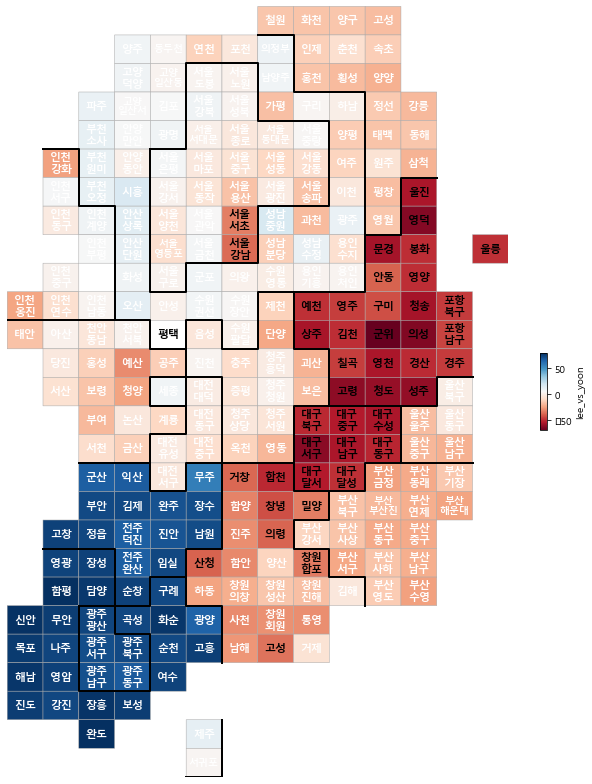

In [71]:
drawKorea('lee_vs_yoon', final_elect_data, 'RdBu');

In [72]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [73]:
pop_folium = final_elect_data.set_index('ID')

pop_folium.drop(['광역시도', '시군'], axis=1, inplace=True)

pop_folium.head()

,pop,lee,yoon,shim,heo,rate_lee,rate_yoon,rate_shim,rate_heo,y,x,lee_vs_yoon
ID,,,,,,,,,,,,
서울 종로,100629.0,46130.0,49172.0,3115.0,558.0,45.841656,48.864641,3.095529,0.554512,4.0,6.0,-3.022985
서울 중구,84998.0,38244.0,42906.0,2310.0,463.0,44.994000,50.478835,2.717711,0.544719,5.0,6.0,-5.484835
서울 용산,152068.0,60063.0,85047.0,4374.0,755.0,39.497462,55.926954,2.876345,0.496488,6.0,6.0,-16.429492
서울 성동,197240.0,84411.0,103880.0,5365.0,969.0,42.796086,52.666802,2.720037,0.491280,5.0,7.0,-9.870716
서울 광진,235471.0,109922.0,113733.0,7072.0,1416.0,46.681757,48.300215,3.003342,0.601348,6.0,7.0,-1.618458


In [76]:
geo_path = './data/05._skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=6)
map.choropleth(geo_data = geo_str,
               data = pop_folium['lee_vs_yoon'],
               columns = [pop_folium.index, pop_folium['lee_vs_yoon']],
               fill_color = 'PuBu', #PuRd, YlGnBu
               key_on = 'feature.id')

map

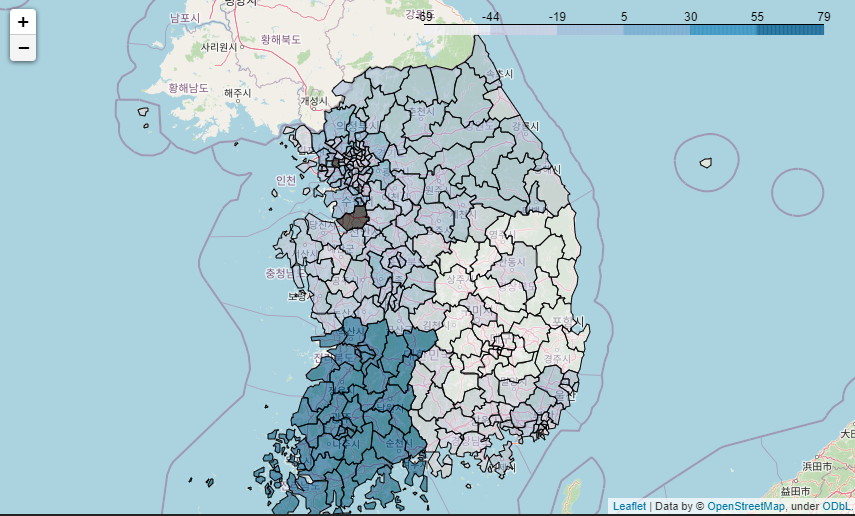